In [1]:
import pandas as pd
from config import Config
import os


In [3]:

# print(Config.get_df_from_pkl(Config.PROFIT_DIR).head())
print(Config.get_df_from_pkl(Config.INFO_DIR).columns)
# station_id = random.choice(list(Config.STATION_PATH.iterdir())).name
# print(f"Station ID: {station_id}")

# station = StationDataFile(station_id)
# price_df = station.get_price_df()
# point_df = station.get_point_data_df()
# day_df = station.get_day_df_random()

# print(day_df.columns)

Index(['pvs_site_id', 'site_name', 'sn', 'lon', 'lat', 'time_zone',
       'energy_management_mode', 'ai_work_mode', 'site_type', 'connect_type',
       'inverter_pv_capacity', 'hybrid_inverter_pv_capacity',
       'hybrid_inverter_rated_output_power', 'battery_max_charge_power',
       'battery_max_discharge_power', 'battery_capacity', 'max_battery_soc',
       'min_battery_soc', 'feed_in_grid_mode', 'feed_in_grid_limit_power',
       'feed_in_grid_limit_percent', 'purchased_grid_mode',
       'purchased_grid_limit_power', 'storm_watch_enable', 'create_time',
       'update_time'],
      dtype='object')


In [6]:
def _list_files(directory):
    return [f for f in os.listdir(directory) if os.path.isfile(os.path.join(directory, f))]
def _list_folders(directory):
    return [f for f in os.listdir(directory) if os.path.isdir(os.path.join(directory, f))]

print("Main DATA_PATH files:")
print(_list_files(DATA_PATH))
print("Main DATA_PATH folders:")
stations = _list_folders(STATION_DATA_PATH)
print(stations[:5])  # Show only first 5 folders
print("\nStation Data files:")
print(_list_files(STATION_DATA_PATH / stations[0]))  # Show files in the first station folder

Main DATA_PATH files:
['filtered_station_info.pkl', 'profit_metrics_info_df_cleaned.pkl', '文档说明.md']
Main DATA_PATH folders:
['5000617', '5009122', '5010604', '5012760', '5013972']

Station Data files:
['5000617_2025-04-18_2025-09-27_load_acc.pkl', '5000617_2025-04-18_2025-09-27_pv_acc.pkl', '5000617_point_data.pkl', '5000617_price.pkl']


In [2]:

def inspect_pkl(file_path):
    print(f"\n{'='*20} Inspecting: {file_path.name} {'='*20}")
    try:
        data = pd.read_pickle(file_path)
        print(f"Type: {type(data)}")
        if isinstance(data, pd.DataFrame):
            print(f"Shape: {data.shape}")
            print("\nColumns:")
            print(data.columns.tolist())
            print("\nHead:")
            print(data.head())
        elif isinstance(data, pd.Series):
            print(f"Length: {len(data)}")
            print("\nHead:")
            print(data.head())
        else:
            print("\nData Preview:")
            print(data)
    except Exception as e:
        print(f"Error loading {file_path}: {e}")

DATA_PATH = Config.DATA_PATH
main_files = [
    DATA_PATH / "profit_metrics_info_df_cleaned.pkl",
    DATA_PATH / "filtered_station_info.pkl"
]

for f in main_files:
    if f.exists():
        inspect_pkl(f)
    else:
        print(f"File not found: {f}")


==================== Inspecting: profit_metrics_info_df_cleaned.pkl ====================
Type: <class 'pandas.core.frame.DataFrame'>
Shape: (14523, 27)

Columns:
['pvs_site_id', 'date', 'ai_work_mode', 'purchased_price_exist', 'feed_in_price_exist', 'history_data_exist', 'pv_day_energy', 'load_day_energy', 'battery_charge_day_energy_ai_mode', 'battery_discharge_day_energy_ai_mode', 'feed_grid_day_energy_ai_mode', 'fetch_grid_day_energy_ai_mode', 'feed_grid_day_incomes_ai_mode', 'fetch_grid_day_fees_ai_mode', 'station_day_cost_ai_mode', 'station_day_profit_ai_mode', 'battery_charge_day_energy_simulink_mode', 'battery_discharge_day_energy_simulink_mode', 'feed_grid_day_energy_simulink_mode', 'fetch_grid_day_energy_simulink_mode', 'feed_grid_day_incomes_simulink_mode', 'fetch_grid_day_fees_simulink_mode', 'station_day_cost_simulink_mode', 'station_day_profit_simulink_mode', 'cost_down_rate_percent', 'profit_increase_rate_percent', 'insert_time']

Head:
   pvs_site_id        date  ai_work

In [3]:

# 2. Inspect a specific station's data
station_id = "5000617"
station_dir = DATA_PATH / "station_data" / station_id
if station_dir.exists():
    station_files = [
        station_dir / f"{station_id}_point_data.pkl",
        station_dir / f"{station_id}_price.pkl"
    ]
    for f in station_files:
        if f.exists():
            inspect_pkl(f)


==================== Inspecting: 5000617_point_data.pkl ====================
Type: <class 'pandas.core.frame.DataFrame'>
Shape: (46657, 11)

Columns:
['datetime', 'load_forecast', 'insert_time_load', 'pv_forecast', 'insert_time_pv', 'pv_power', 'load_power', 'battery_charge_power', 'battery_discharge_power', 'battery_soc', 'available_battery_capacity']

Head:
             datetime  load_forecast insert_time_load  pv_forecast  \
0 2025-04-18 00:00:00            NaN              NaT          0.0   
1 2025-04-18 00:05:00            NaN              NaT          0.0   
2 2025-04-18 00:10:00            NaN              NaT          0.0   
3 2025-04-18 00:15:00            NaN              NaT          0.0   
4 2025-04-18 00:20:00            NaN              NaT          0.0   

       insert_time_pv  pv_power  load_power  battery_charge_power  \
0 2025-04-18 18:15:19       0.0       480.0                   0.0   
1 2025-04-18 18:15:19       0.0       469.0                   0.0   
2 2025-04

Station ID: 5000617
Static Battery Capacity (from filtered_station_info.pkl): 10200

Dynamic Available Battery Capacity Summary (from point_data.pkl):
count    46440.000000
mean     10170.348837
std        596.102141
min          0.000000
25%      10200.000000
50%      10200.000000
75%      10200.000000
max      30600.000000
Name: available_battery_capacity, dtype: float64

Unique values in available_battery_capacity: [10200.     0.    nan 20400. 30600.]


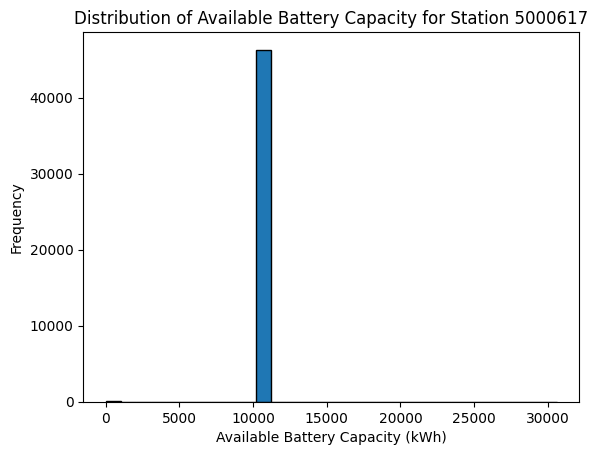

In [11]:

# 检查电池容量的一致性
station_id = "5000617"

# 1. 从电站属性表获取静态容量
station_info = pd.read_pickle(DATA_PATH / "filtered_station_info.pkl")
static_cap = station_info[station_info['pvs_site_id'] == int(station_id)]['battery_capacity'].values[0]

# 2. 从遥测数据表获取可用容量
point_data = pd.read_pickle(STATION_DATA_PATH / station_id / f"{station_id}_point_data.pkl")
dynamic_cap_summary = point_data['available_battery_capacity'].describe()
unique_dynamic_caps = point_data['available_battery_capacity'].unique()

print(f"Station ID: {station_id}")
print(f"Static Battery Capacity (from filtered_station_info.pkl): {static_cap}")
print(f"\nDynamic Available Battery Capacity Summary (from point_data.pkl):")
print(dynamic_cap_summary)
print(f"\nUnique values in available_battery_capacity: {unique_dynamic_caps}")

# check distribution with graph
import matplotlib.pyplot as plt
plt.hist(point_data['available_battery_capacity'], bins=30, edgecolor='black')
plt.title(f"Distribution of Available Battery Capacity for Station {station_id}")
plt.xlabel("Available Battery Capacity (kWh)")
plt.ylabel("Frequency")
plt.show()

Total stations found: 1314

Price Configuration Distribution:
----------------------------------------
Price Type      | Charge Type     | Count     
----------------------------------------
Feed-in (1)     | Fixed (0)       | 1134      
Purchase (2)    | Fixed (0)       | 1064      
Feed-in (1)     | Dynamic (4)     | 236       
Purchase (2)    | Dynamic (4)     | 256       


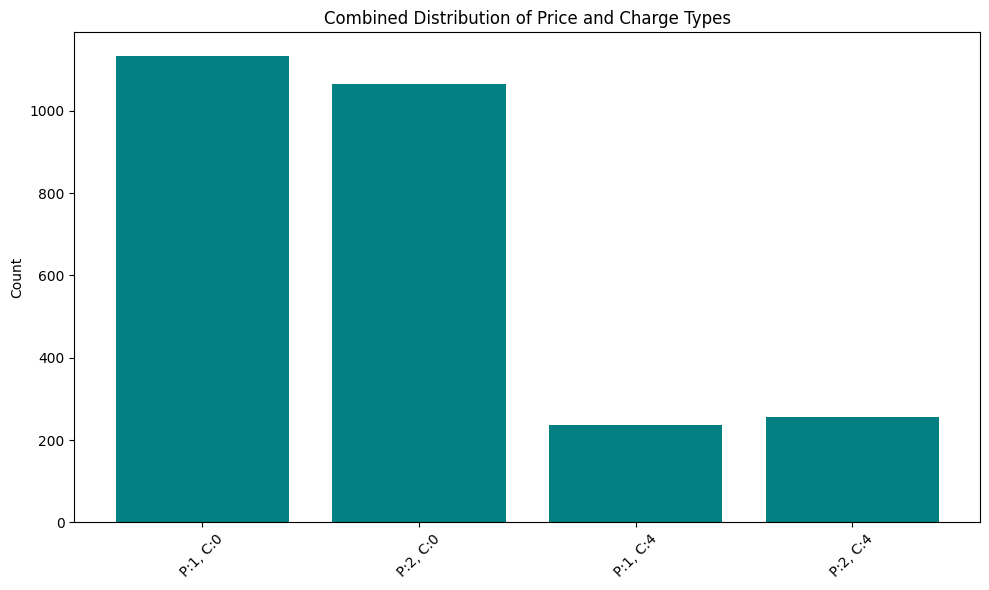

In [16]:

# 详细检查所有电站的电价配置分布 (Price Type & Charge Type)
from pathlib import Path
from collections import Counter
import pandas as pd
import matplotlib.pyplot as plt

price_stats = []
all_stations = [d for d in STATION_DATA_PATH.iterdir() if d.is_dir()]

print(f"Total stations found: {len(all_stations)}")

for station_dir in all_stations:
    s_id = station_dir.name
    price_file = station_dir / f"{s_id}_price.pkl"
    
    if price_file.exists():
        try:
            price_df = pd.read_pickle(price_file)
            if not price_df.empty:
                # 记录每一个组合 (price_type, charge_type)
                configs = price_df.groupby(['price_type', 'charge_type']).size().reset_index()
                for _, row in configs.iterrows():
                    price_stats.append((row['price_type'], row['charge_type']))
        except Exception as e:
            continue

# 统计组合分布
distribution = Counter(price_stats)

print("\nPrice Configuration Distribution:")
print("-" * 40)
print(f"{'Price Type':<15} | {'Charge Type':<15} | {'Count':<10}")
print("-" * 40)

# mapping
p_map = {1: "Feed-in (1)", 2: "Purchase (2)"}
c_map = {0: "Fixed (0)", 4: "Dynamic (4)"}

for (pt, ct), count in distribution.items():
    pt_name = p_map.get(pt, f"Unknown ({pt})")
    ct_name = c_map.get(ct, f"Unknown ({ct})")
    print(f"{pt_name:<15} | {ct_name:<15} | {count:<10}")

# 绘图展示
labels = [f"P:{p}, C:{c}" for (p, c) in distribution.keys()]
counts = list(distribution.values())

plt.figure(figsize=(10, 6))
plt.bar(labels, counts, color='teal')
plt.title("Combined Distribution of Price and Charge Types")
plt.xticks(rotation=45)
plt.ylabel("Count")
plt.tight_layout()
plt.show()


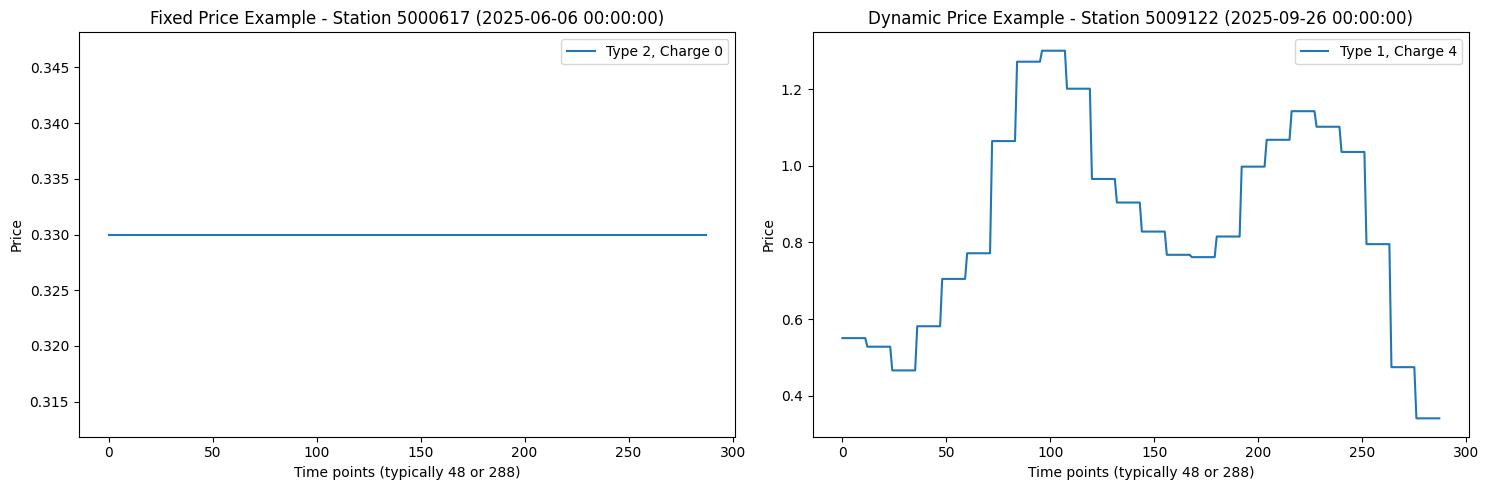

In [18]:

# 获取固定电价和动态电价的样本并对比
import numpy as np

def plot_price_sample(station_id, title_prefix):
    price_file = STATION_DATA_PATH / station_id / f"{station_id}_price.pkl"
    df = pd.read_pickle(price_file)
    
    # 选一行数据绘图
    sample_row = df.iloc[0]
    # 根据 p_type 选择数组
    price_seq = sample_row['price_array'] if sample_row['price_type'] == 2 else sample_row['price_ori_array']
    
    # 如果是字符串形式的列表，尝试转换
    if isinstance(price_seq, str):
        price_seq = eval(price_seq)
        
    plt.plot(price_seq, label=f"Type {sample_row['price_type']}, Charge {sample_row['charge_type']}")
    plt.title(f"{title_prefix} - Station {station_id} ({sample_row['date']})")
    plt.xlabel("Time points (typically 48 or 288)")
    plt.ylabel("Price")
    plt.legend()

# 寻找动态电价的站点 ID
dynamic_station = None
for station_dir in all_stations[:100]: # 缩小搜索范围
    s_id = station_dir.name
    pf = station_dir / f"{s_id}_price.pkl"
    if pf.exists():
        tmp = pd.read_pickle(pf)
        if 4 in tmp['charge_type'].values:
            dynamic_station = s_id
            break

plt.figure(figsize=(15, 5))

# Plot Fixed Sample (using 5000617)
plt.subplot(1, 2, 1)
plot_price_sample("5000617", "Fixed Price Example")

# Plot Dynamic Sample
if dynamic_station:
    plt.subplot(1, 2, 2)
    plot_price_sample(dynamic_station, "Dynamic Price Example")
else:
    print("No dynamic station found in first 100 folders.")

plt.tight_layout()
plt.show()


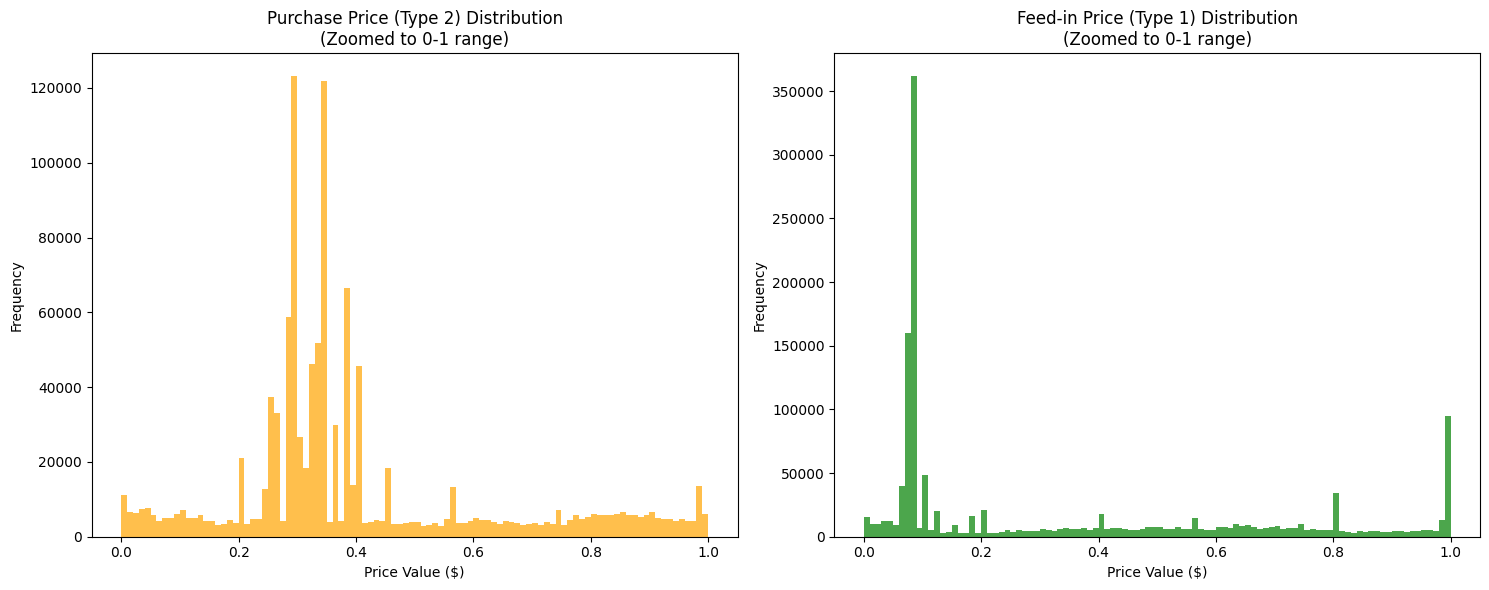

Stats for Purchase: Min=-0.3481, Max=6.7390, Mean=0.7617
Stats for Feed-in: Min=-0.3481, Max=6.3152, Mean=0.5084


In [20]:

# 重新分析电价数值的分布情况
import numpy as np
import matplotlib.pyplot as plt

all_purchase_prices = []
all_feedin_prices = []

# 采样 100 个站点进行多站点分析
sample_stations = all_stations[:100]

for station_dir in sample_stations:
    s_id = station_dir.name
    pf = station_dir / f"{s_id}_price.pkl"
    if not pf.exists(): continue
    
    df = pd.read_pickle(pf)
    for _, row in df.iterrows():
        # 统一从 price_array 读取，因为它在 Type 1 和 Type 2 中似乎都有数据
        p_val = row['price_array']
        if pd.isna(p_val):
            p_val = row['price_ori_array'] # 兜底逻辑
            
        if isinstance(p_val, str):
            try:
                p_val = eval(p_val)
            except:
                continue
                
        if isinstance(p_val, (list, np.ndarray)):
            clean_prices = [float(x) for x in p_val if pd.notnull(x) and -10 < float(x) < 10] # 过滤极端异常值
            if row['price_type'] == 2:
                all_purchase_prices.extend(clean_prices)
            elif row['price_type'] == 1:
                all_feedin_prices.extend(clean_prices)

# 绘图
plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)
plt.hist(all_purchase_prices, bins=100, color='orange', alpha=0.7, range=(0, 1)) # 设置合理的 x 轴范围
plt.title("Purchase Price (Type 2) Distribution\n(Zoomed to 0-1 range)")
plt.xlabel("Price Value ($)")
plt.ylabel("Frequency")

plt.subplot(1, 2, 2)
plt.hist(all_feedin_prices, bins=100, color='green', alpha=0.7, range=(0, 1))
plt.title("Feed-in Price (Type 1) Distribution\n(Zoomed to 0-1 range)")
plt.xlabel("Price Value ($)")
plt.ylabel("Frequency")

plt.tight_layout()
plt.show()

print(f"Stats for Purchase: Min={np.min(all_purchase_prices):.4f}, Max={np.max(all_purchase_prices):.4f}, Mean={np.mean(all_purchase_prices):.4f}")
print(f"Stats for Feed-in: Min={np.min(all_feedin_prices):.4f}, Max={np.max(all_feedin_prices):.4f}, Mean={np.mean(all_feedin_prices):.4f}")


In [22]:

# 检查一个电站的 charge_type 是否是固定的
stations_with_variable_charge_type = []
station_consistency_stats = []

for station_dir in all_stations[:200]: # 采样前 200 个站点
    s_id = station_dir.name
    pf = station_dir / f"{s_id}_price.pkl"
    if not pf.exists(): continue
    
    df = pd.read_pickle(pf)
    if df.empty: continue
    
    unique_charge_types = df['charge_type'].unique()
    
    # 记录该站点的基本情况
    station_consistency_stats.append({
        'site_id': s_id,
        'unique_types': unique_charge_types.tolist(),
        'is_fixed_per_station': len(unique_charge_types) == 1
    })
    
    if len(unique_charge_types) > 1:
        stations_with_variable_charge_type.append(s_id)

# 汇总结果
consistency_df = pd.DataFrame(station_consistency_stats)
variable_count = len(stations_with_variable_charge_type)
total_checked = len(station_consistency_stats)

print(f"Checked {total_checked} stations.")
print(f"Stations with multiple charge_types: {variable_count}")

if variable_count > 0:
    print("\nExample of station with multiple charge_types:")
    # 取一个变化的例子展示其具体数据
    example_id = stations_with_variable_charge_type[0]
    example_df = pd.read_pickle(STATION_DATA_PATH / example_id / f"{example_id}_price.pkl")
    print(example_df[['date', 'price_type', 'charge_type']].drop_duplicates().head(10))
else:
    print("\nIn the sampled stations, EVERY station has a unique and fixed charge_type.")

# 进一步检查：购电(2)和馈网(1)的 charge_type 是否一致
# (通常购电是动态，馈网可能还是固定的)


Checked 200 stations.
Stations with multiple charge_types: 27

Example of station with multiple charge_types:
             date  price_type  charge_type
104922 2025-08-14           1            4
104923 2025-08-14           2            4
111995 2025-08-17           2            4
111996 2025-08-17           1            4
115040 2025-08-18           2            4
115041 2025-08-18           1            4
118430 2025-08-20           2            0
118431 2025-08-20           1            4
136938 2025-08-27           2            0
136939 2025-08-27           1            4


Starting analysis for 500 stations...
Processing station 0/500...
Processing station 100/500...
Processing station 200/500...
Processing station 300/500...
Processing station 400/500...

Daily Price Type Distribution (Unit: Station-Days):
--------------------------------------------------
Price Type      | Charge Type     | Total Days  
--------------------------------------------------
Feed-in (1)     | Fixed (0)       | 20274       
Feed-in (1)     | Dynamic (4)     | 11250       
Purchase (2)    | Fixed (0)       | 18293       
Purchase (2)    | Dynamic (4)     | 11676       


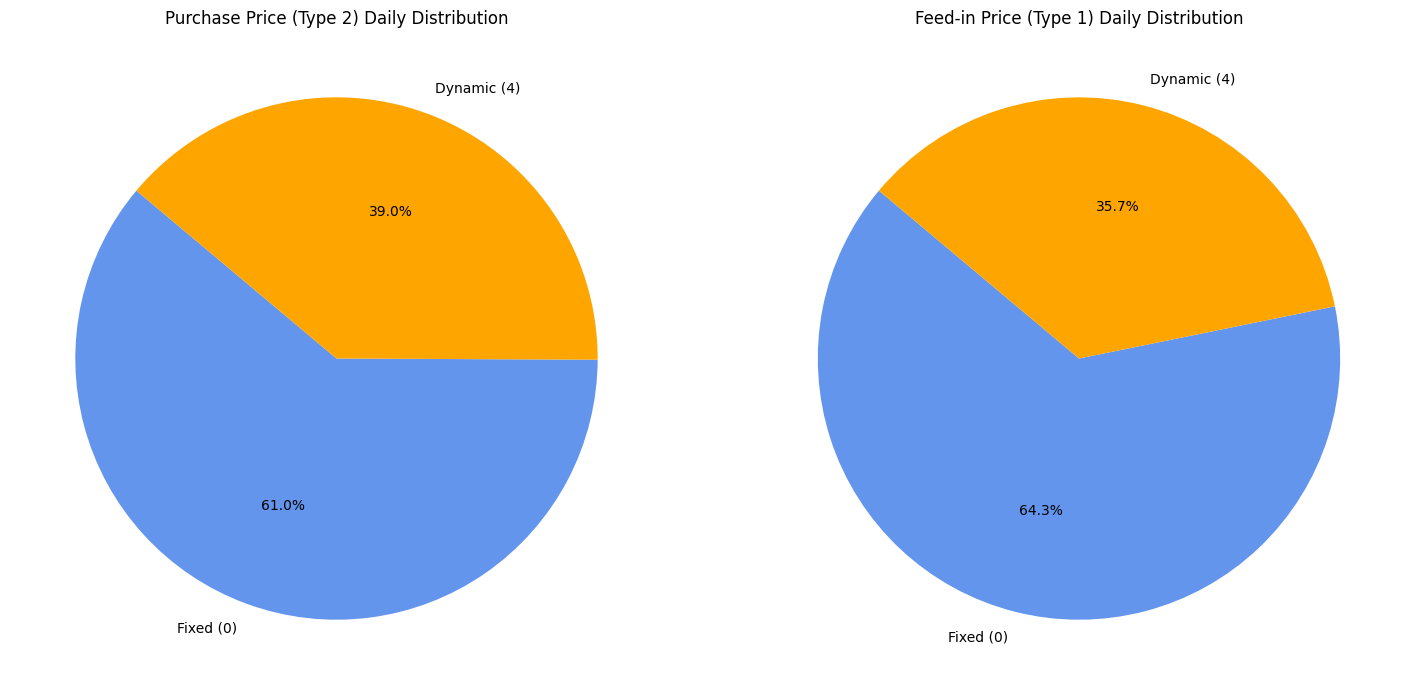

In [25]:

# 以“天”为单位统计固定电价和动态电价的分布 (不使用 tqdm)
all_records = []
sample_size = 500  # 采样 500 个站点的全量日期数据
all_stations = [d for d in STATION_DATA_PATH.iterdir() if d.is_dir()]

print(f"Starting analysis for {sample_size} stations...")

for i, station_dir in enumerate(all_stations[:sample_size]):
    if i % 100 == 0:
        print(f"Processing station {i}/{sample_size}...")
        
    s_id = station_dir.name
    pf = station_dir / f"{s_id}_price.pkl"
    if not pf.exists(): continue
    
    try:
        df = pd.read_pickle(pf)
        # 每一行代表一个站点在某一天的某一类价格 (Type 1 or 2)
        counts = df.groupby(['price_type', 'charge_type']).size().reset_index(name='days')
        all_records.append(counts)
    except:
        continue

# 合并结果
if all_records:
    total_daily_stats = pd.concat(all_records).groupby(['price_type', 'charge_type'])['days'].sum().reset_index()

    # 格式化输出
    p_map = {1: "Feed-in (1)", 2: "Purchase (2)"}
    c_map = {0: "Fixed (0)", 4: "Dynamic (4)"}

    print("\nDaily Price Type Distribution (Unit: Station-Days):")
    print("-" * 50)
    print(f"{'Price Type':<15} | {'Charge Type':<15} | {'Total Days':<12}")
    print("-" * 50)

    for _, row in total_daily_stats.iterrows():
        pt = p_map.get(row['price_type'], f"Unknown({row['price_type']})")
        ct = c_map.get(row['charge_type'], f"Unknown({row['charge_type']})")
        print(f"{pt:<15} | {ct:<15} | {int(row['days']):<12}")

    # 饼图可视化
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 7))

    def plot_pie(type_id, ax, title):
        data = total_daily_stats[total_daily_stats['price_type'] == type_id]
        if data.empty: return
        labels = [c_map.get(c, str(c)) for c in data['charge_type']]
        ax.pie(data['days'], labels=labels, autopct='%1.1f%%', startangle=140, colors=['cornflowerblue', 'orange'])
        ax.set_title(title)

    plot_pie(2, ax1, "Purchase Price (Type 2) Daily Distribution")
    plot_pie(1, ax2, "Feed-in Price (Type 1) Daily Distribution")

    plt.tight_layout()
    plt.show()
else:
    print("No price records found.")


In [27]:

# 调查为什么 Feed-in 和 Purchase 的总天数不相等
# 检查是否存在某些天只记录了一种价格类型

discrepancy_records = []

for station_dir in all_stations[:200]: # 采样 200 个站点
    s_id = station_dir.name
    pf = station_dir / f"{s_id}_price.pkl"
    if not pf.exists(): continue
    
    df = pd.read_pickle(pf)
    # 按日期统计价格类型的数量
    date_counts = df.groupby('date')['price_type'].nunique()
    
    # 找出那些价格类型数量不等于 2 的日期
    incomplete_dates = date_counts[date_counts != 2]
    
    if not incomplete_dates.empty:
        for date, count in incomplete_dates.items():
            # 记录缺失哪种类型
            existing_types = df[df['date'] == date]['price_type'].unique().tolist()
            discrepancy_records.append({
                'site_id': s_id,
                'date': date,
                'type_count': count,
                'existing_types': existing_types
            })

if discrepancy_records:
    disc_df = pd.DataFrame(discrepancy_records)
    print(f"Found {len(disc_df)} station-days with incomplete price types.")
    print("\nBreakdown of existing types in incomplete records:")
    print(disc_df['existing_types'].value_counts())
    
    print("\nExample records:")
    print(disc_df.head(10))
else:
    print("In the sample, all station-days have both Feed-in and Purchase price types.")


Found 1012 station-days with incomplete price types.

Breakdown of existing types in incomplete records:
existing_types
[1]    702
[2]    310
Name: count, dtype: int64

Example records:
   site_id       date  type_count existing_types
0  5028565 2025-09-05           1            [1]
1  5028565 2025-09-06           1            [1]
2  5044610 2025-06-06           1            [1]
3  5044610 2025-06-07           1            [1]
4  5059818 2025-06-18           1            [1]
5  5059818 2025-06-19           1            [1]
6  5059818 2025-06-20           1            [1]
7  5059818 2025-06-21           1            [1]
8  5059818 2025-06-22           1            [1]
9  5059818 2025-06-23           1            [1]


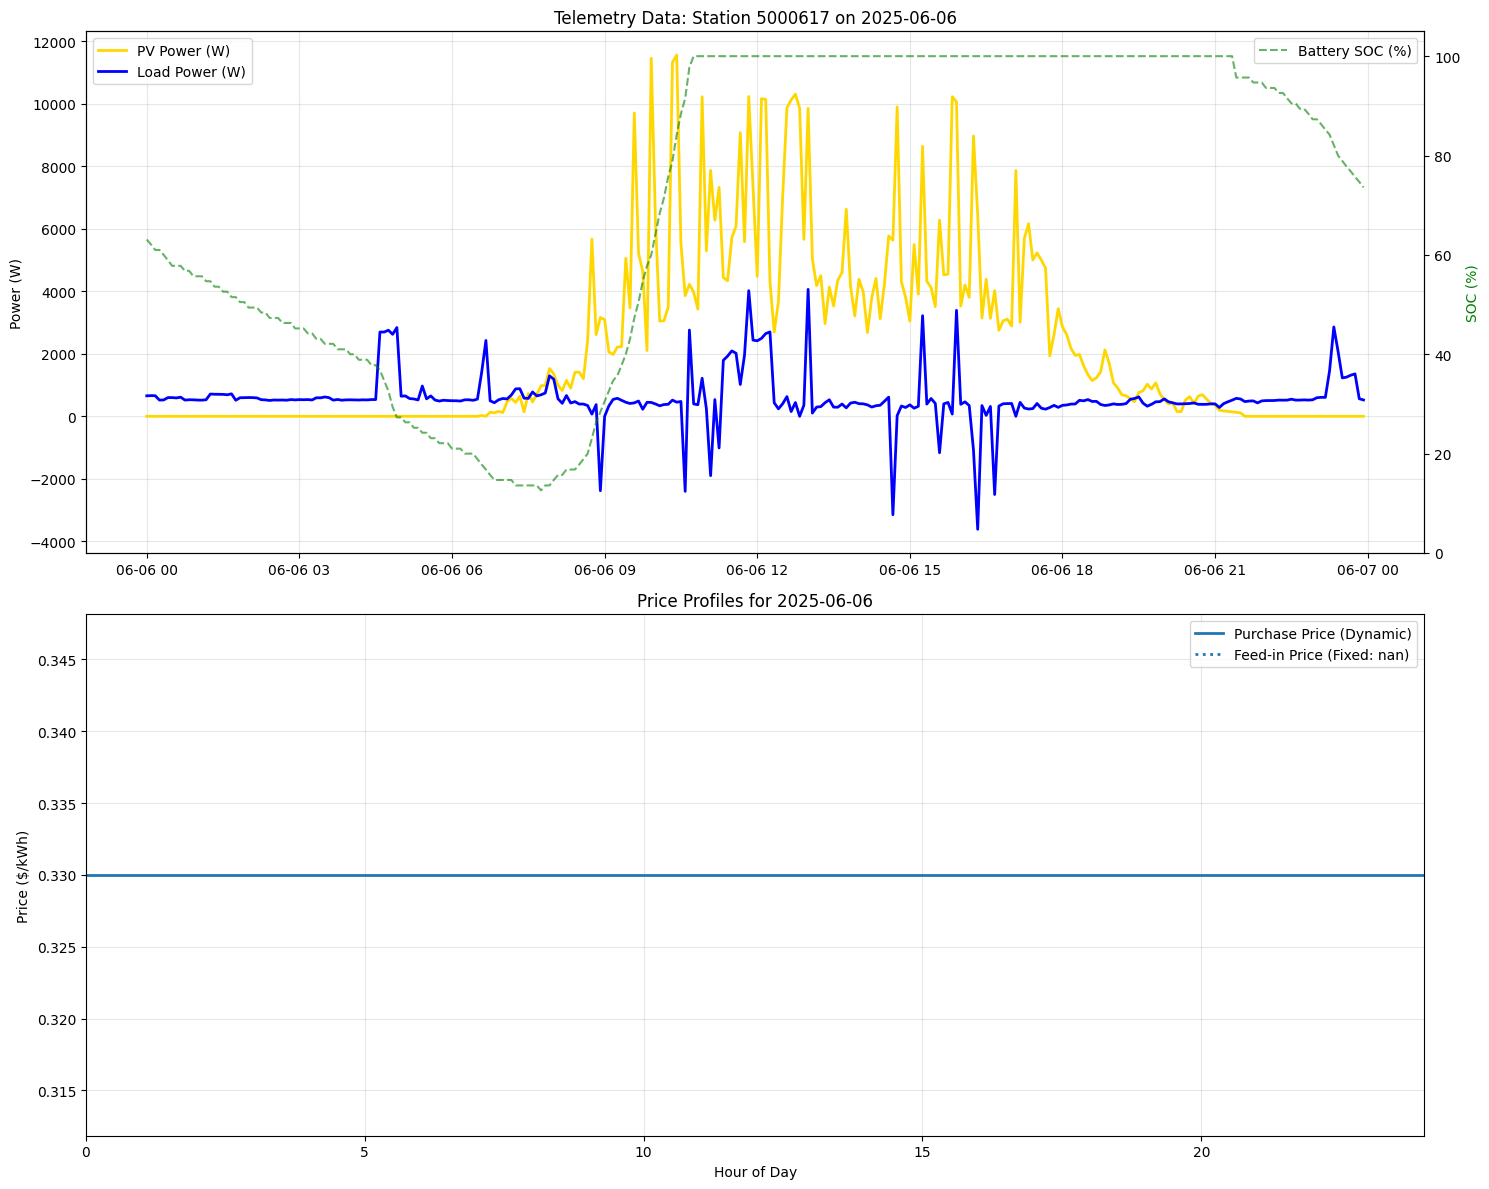

In [29]:

# 修正后的可视化函数，处理固定电价为单值的情况
def visualize_day(station_id, target_date):
    # 1. 加载时序数据
    point_file = STATION_DATA_PATH / station_id / f"{station_id}_point_data.pkl"
    points = pd.read_pickle(point_file)
    points['datetime'] = pd.to_datetime(points['datetime'])
    
    # 对齐日期过滤
    target_dt = pd.to_datetime(target_date).date()
    day_points = points[points['datetime'].dt.date == target_dt].sort_values('datetime')
    
    if day_points.empty:
        print(f"No point data found for {station_id} on {target_date}")
        return

    # 2. 加载电价数据
    price_file = STATION_DATA_PATH / station_id / f"{station_id}_price.pkl"
    prices = pd.read_pickle(price_file)
    prices['date'] = pd.to_datetime(prices['date']).dt.date
    day_prices = prices[prices['date'] == target_dt]
    
    # 3. 绘图
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 12))
    
    # --- Top Plot: Power and SOC ---
    ax1.plot(day_points['datetime'], day_points['pv_power'], label='PV Power (W)', color='gold', linewidth=2)
    ax1.plot(day_points['datetime'], day_points['load_power'], label='Load Power (W)', color='blue', linewidth=2)
    ax1.set_ylabel("Power (W)", color='black')
    
    ax1_soc = ax1.twinx()
    ax1_soc.plot(day_points['datetime'], day_points['battery_soc'], label='Battery SOC (%)', color='green', linestyle='--', alpha=0.6)
    ax1_soc.set_ylabel("SOC (%)", color='green')
    ax1_soc.set_ylim(0, 105)
    
    ax1.set_title(f"Telemetry Data: Station {station_id} on {target_date}")
    ax1.grid(True, alpha=0.3)
    ax1.legend(loc='upper left')
    ax1_soc.legend(loc='upper right')
    
    # --- Bottom Plot: Prices ---
    if not day_prices.empty:
        for _, row in day_prices.iterrows():
            p_type = "Purchase" if row['price_type'] == 2 else "Feed-in"
            p_val = row['price_array'] if row['price_type'] == 2 else row['price_ori_array']
            
            # 处理字符串形式
            if isinstance(p_val, str):
                try: p_val = eval(p_val)
                except: pass
            
            # 处理单值还是序列
            if isinstance(p_val, (list, np.ndarray, pd.Series)):
                p_array = np.array(p_val)
                x_axis = np.linspace(0, 24, len(p_array))
                ax2.step(x_axis, p_array, where='post', label=f"{p_type} Price (Dynamic)", linewidth=2)
            else:
                # 固定电价
                ax2.axhline(y=float(p_val), label=f"{p_type} Price (Fixed: {p_val})", linestyle=':', linewidth=2)
    
    ax2.set_title(f"Price Profiles for {target_date}")
    ax2.set_xlabel("Hour of Day")
    ax2.set_ylabel("Price ($/kWh)")
    ax2.set_xlim(0, 24)
    ax2.grid(True, alpha=0.3)
    ax2.legend()
    
    plt.tight_layout()
    plt.show()

# 查看示例
visualize_day("5000617", "2025-06-06")


In [30]:

# 深入检查 price_ori_array 的内容
# 看看它在不同 price_type 下的表现，以及是否包含有效数据

ori_array_stats = []

for station_dir in all_stations[:100]:
    s_id = station_dir.name
    pf = station_dir / f"{s_id}_price.pkl"
    if not pf.exists(): continue
    
    df = pd.read_pickle(pf)
    
    # 统计不同 price_type 下 price_ori_array 的非空比例
    stats = df.groupby('price_type').apply(lambda x: pd.Series({
        'total_rows': len(x),
        'ori_not_null': x['price_ori_array'].notnull().sum(),
        'price_not_null': x['price_array'].notnull().sum()
    }), include_groups=False).reset_index()
    
    stats['site_id'] = s_id
    ori_array_stats.append(stats)

# 汇总展示
if ori_array_stats:
    all_stats_df = pd.concat(ori_array_stats)
    summary = all_stats_df.groupby('price_type').agg({
        'total_rows': 'sum',
        'ori_not_null': 'sum',
        'price_not_null': 'sum'
    })
    print("Aggregate Statistics for price_ori_array and price_array:")
    print(summary)
    
    print("\nObservation:")
    # 随机取一个存在 price_ori_array 的样本查看内容
    sample_with_ori = None
    for station_dir in all_stations:
        pf = station_dir / f"{station_dir.name}_price.pkl"
        if pf.exists():
            df = pd.read_pickle(pf)
            if df['price_ori_array'].notnull().any():
                sample_with_ori = df[df['price_ori_array'].notnull()].iloc[0]
                break
    
    if sample_with_ori is not None:
        print(f"\nSample from Station {sample_with_ori['site_id']} (Type {sample_with_ori['price_type']}):")
        print(f"price_ori_array type: {type(sample_with_ori['price_ori_array'])}")
        print(f"price_ori_array content (first 50 chars): {str(sample_with_ori['price_ori_array'])[:100]}...")
        print(f"price_array content (first 50 chars): {str(sample_with_ori['price_array'])[:100]}...")


Aggregate Statistics for price_ori_array and price_array:
            total_rows  ori_not_null  price_not_null
price_type                                          
1                 5764          2898            5764
2                 5614             0            5614

Observation:

Sample from Station 5009122 (Type 1):
price_ori_array type: <class 'str'>
price_ori_array content (first 50 chars): [0.55004, 0.55004, 0.55004, 0.55004, 0.55004, 0.55004, 0.55004, 0.55004, 0.55004, 0.55004, 0.55004, ...
price_array content (first 50 chars): [0.65004, 0.65004, 0.65004, 0.65004, 0.65004, 0.65004, 0.65004, 0.65004, 0.65004, 0.65004, 0.65004, ...


In [31]:

# 验证：缺失的购电电价是否“藏”在馈网记录的 price_ori_array 中？
# 寻找只有 price_type=1 (Feed-in) 的日期，对比其两个数组

hypothesis_test_results = []

for station_dir in all_stations[:300]:
    s_id = station_dir.name
    pf = station_dir / f"{s_id}_price.pkl"
    if not pf.exists(): continue
    
    df = pd.read_pickle(pf)
    
    # 找到只有 Type 1 的日期
    date_counts = df.groupby('date')['price_type'].unique()
    type1_only_dates = date_counts[date_counts.apply(lambda x: len(x)==1 and x[0]==1)].index
    
    for date in type1_only_dates:
        row = df[(df['date'] == date) & (df['price_type'] == 1)].iloc[0]
        
        # 提取两个数组
        p_arr = row['price_array']
        o_arr = row['price_ori_array']
        
        if pd.notnull(p_arr) and pd.notnull(o_arr):
            # 转为 list
            if isinstance(p_arr, str): p_arr = eval(p_arr)
            if isinstance(o_arr, str): o_arr = eval(o_arr)
            
            # 检查是否有显著特征（比如平时买电是 0.3，卖电是 0.1，如果 ori 变成了 0.3，那它可能就是买电价）
            hypothesis_test_results.append({
                'site_id': s_id,
                'date': date,
                'price_array_mean': np.mean(p_arr),
                'price_ori_array_mean': np.mean(o_arr)
            })
            if len(hypothesis_test_results) > 10: break
    if len(hypothesis_test_results) > 10: break

if hypothesis_test_results:
    hyp_df = pd.DataFrame(hypothesis_test_results)
    print("Days with ONLY price_type=1 (Feed-in), comparing its two arrays:")
    print(hyp_df)
else:
    print("No sample found with both arrays on a Type-1-only day.")


Days with ONLY price_type=1 (Feed-in), comparing its two arrays:
   site_id       date  price_array_mean  price_ori_array_mean
0  5253608 2025-09-08          0.123562              0.123562
1  5330468 2025-09-22          0.253133              0.253133
2  5330468 2025-09-24          0.693321              0.693321
3  5330468 2025-09-26          0.851824              0.851824
4  5330468 2025-09-27          0.491790              0.491790


Difference Analysis (price_array - price_ori_array):
------------------------------------------------------------
Total samples analyzed: 2898
Percentage of constant offsets: 82.44%
Average mean difference: 0.2957

Top 5 Common Mean Differences:
mean_diff
0.000    1242
0.600     401
0.700     215
0.650     147
0.635     118
Name: count, dtype: int64


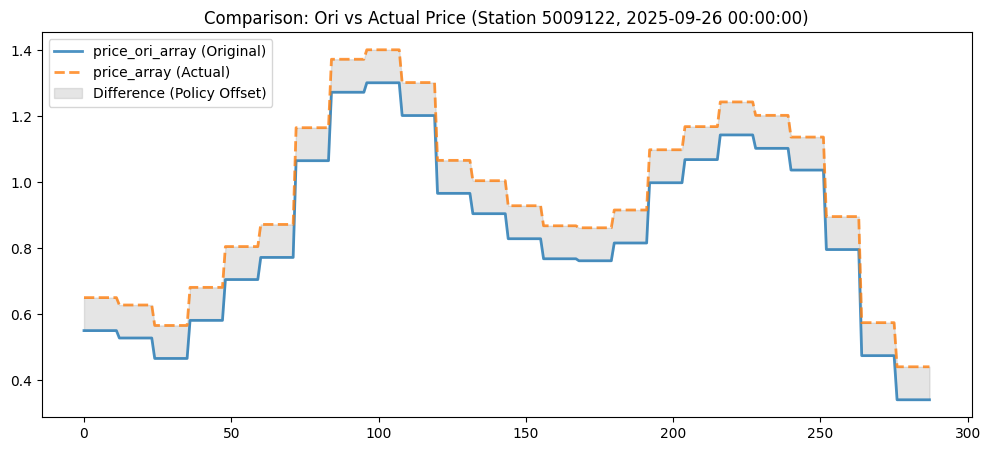

In [33]:

# 详细对比 price_array 和 price_ori_array 的数值差异
# 重点检查 price_type = 1 (Feed-in) 的情况

diff_analysis = []

for station_dir in all_stations[:100]:
    s_id = station_dir.name
    pf = station_dir / f"{s_id}_price.pkl"
    if not pf.exists(): continue
    
    df = pd.read_pickle(pf)
    # 仅看 Type 1 且两个数组都不为空的情况
    type1_df = df[(df['price_type'] == 1) & (df['price_ori_array'].notnull())]
    
    for _, row in type1_df.iterrows():
        p_arr = row['price_array']
        o_arr = row['price_ori_array']
        
        if isinstance(p_arr, str): p_arr = eval(p_arr)
        if isinstance(o_arr, str): o_arr = eval(o_arr)
        
        p_arr = np.array(p_arr, dtype=float)
        o_arr = np.array(o_arr, dtype=float)
        
        if len(p_arr) == len(o_arr):
            diff = p_arr - o_arr
            diff_analysis.append({
                'site_id': s_id,
                'date': row['date'],
                'mean_diff': np.mean(diff),
                'max_diff': np.max(diff),
                'min_diff': np.min(diff),
                'constant_diff': np.allclose(diff, diff[0]) # 检查是否是全局统一偏移
            })

diff_df = pd.DataFrame(diff_analysis)

if not diff_df.empty:
    print("Difference Analysis (price_array - price_ori_array):")
    print("-" * 60)
    print(f"Total samples analyzed: {len(diff_df)}")
    print(f"Percentage of constant offsets: {diff_df['constant_diff'].mean():.2%}")
    print(f"Average mean difference: {diff_df['mean_diff'].mean():.4f}")
    
    # 看看最常见的偏移量
    print("\nTop 5 Common Mean Differences:")
    print(diff_df['mean_diff'].round(4).value_counts().head(5))

    # 可视化一个典型的差异
    sample_diff = diff_df[diff_df['constant_diff']].iloc[0]
    s_id = sample_diff['site_id']
    date = sample_diff['date']
    
    # 重新读取该行绘图
    df_sample = pd.read_pickle(STATION_DATA_PATH / s_id / f"{s_id}_price.pkl")
    row = df_sample[(df_sample['date'] == date) & (df_sample['price_type'] == 1)].iloc[0]
    p_arr = eval(row['price_array']) if isinstance(row['price_array'], str) else row['price_array']
    o_arr = eval(row['price_ori_array']) if isinstance(row['price_ori_array'], str) else row['price_ori_array']
    
    plt.figure(figsize=(12, 5))
    plt.plot(o_arr, label='price_ori_array (Original)', alpha=0.8, linewidth=2)
    plt.plot(p_arr, label='price_array (Actual)', linestyle='--', alpha=0.8, linewidth=2)
    plt.fill_between(range(len(p_arr)), o_arr, p_arr, color='gray', alpha=0.2, label='Difference (Policy Offset)')
    plt.title(f"Comparison: Ori vs Actual Price (Station {s_id}, {date})")
    plt.legend()
    plt.show()
else:
    print("No comparable Type 1 records found in the sample.")


In [35]:

# 统计全量数据规模（天数）
import pandas as pd
from pathlib import Path

# 1. 收益测算表中的总天数 (基准)
profit_df = pd.read_pickle(DATA_PATH / "profit_metrics_info_df_cleaned.pkl")
total_profit_days = len(profit_df)
unique_stations_in_profit = profit_df['pvs_site_id'].nunique()

print(f"Profit Metrics Table Statistics:")
print(f"- Total records (station-days): {total_profit_days}")
print(f"- Unique stations: {unique_stations_in_profit}")
print(f"- Average days per station: {total_profit_days / unique_stations_in_profit:.1f}")

# 2. 统计原始遥测数据的覆盖情况 (采样统计)
sample_size = 200
all_stations = [d for d in STATION_DATA_PATH.iterdir() if d.is_dir()]
actual_point_days = 0

for station_dir in all_stations[:sample_size]:
    s_id = station_dir.name
    point_file = station_dir / f"{s_id}_point_data.pkl"
    if point_file.exists():
        df = pd.read_pickle(point_file)
        if 'datetime' in df.columns:
            actual_point_days += pd.to_datetime(df['datetime']).dt.date.nunique()

estimated_total_point_days = (actual_point_days / sample_size) * len(all_stations)

print(f"\nTime Series (Point Data) Statistics (Estimated from {sample_size} stations):")
print(f"- Estimated total days across all stations: ~{int(estimated_total_point_days)}")

# 3. 统计日期跨度
min_date = profit_df['date'].min()
max_date = profit_df['date'].max()
print(f"\nDate Range in Profit Table: {min_date} to {max_date}")


Profit Metrics Table Statistics:
- Total records (station-days): 14523
- Unique stations: 436
- Average days per station: 33.3

Time Series (Point Data) Statistics (Estimated from 200 stations):
- Estimated total days across all stations: ~171227

Date Range in Profit Table: 2025-05-16 to 2025-09-28


Descriptive Statistics for Profit Metrics:
       station_day_profit_ai_mode  station_day_profit_simulink_mode  \
count                14523.000000                      14523.000000   
mean                    41.810672                         41.128995   
std                    127.030415                        119.163865   
min                    -55.314400                        -28.993475   
25%                      8.071210                          7.631256   
50%                     21.250551                         21.233141   
75%                     48.700962                         48.950558   
max                   7201.823242                       8187.609375   

       cost_down_rate_percent  profit_increase_rate_percent  
count            14523.000000                  1.452300e+04  
mean               -18.549110                  2.630711e+02  
std               2468.934682                  2.058785e+04  
min            -287720.437500                 -4.023897e+05  
25%    

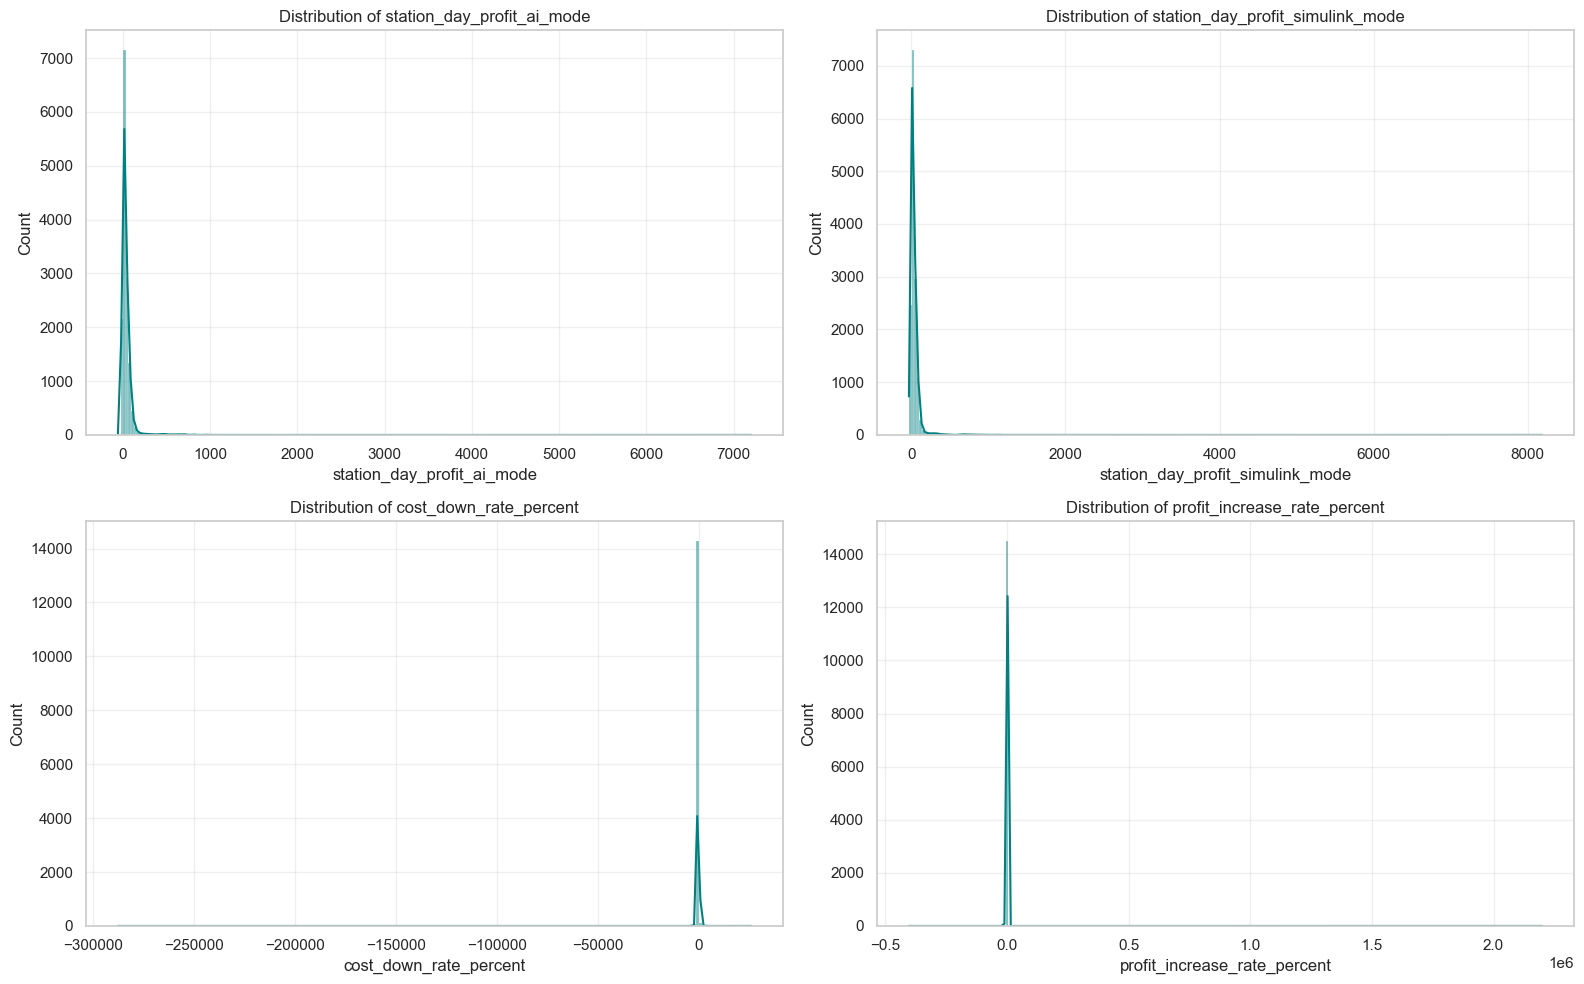


Extreme Values for cost_down_rate_percent:
Max: 26166.79
Min: -287720.44
Zero values: 6303


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from config import Config

df = pd.read_pickle(Config.DATA_PATH / "profit_metrics_info_df_cleaned.pkl")

# 选择关键指标进行分布分析
focus_cols = [
    'station_day_profit_ai_mode', 
    'station_day_profit_simulink_mode', 
    'cost_down_rate_percent', 
    'profit_increase_rate_percent'
]

# 统计描述
print("Descriptive Statistics for Profit Metrics:")
print(df[focus_cols].describe())

# 可视化分布
plt.figure(figsize=(16, 10))

for i, col in enumerate(focus_cols):
    plt.subplot(2, 2, i + 1)
    # 使用 histplot, 并限制一下 x 轴范围以排除可能的长尾异常值干扰观察
    sns.histplot(df[col], kde=True, color='teal')
    plt.title(f"Distribution of {col}")
    plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# 检查 cost_down_rate_percent 的异常值 (通常这类百分比不应太大或太小)
print("\nExtreme Values for cost_down_rate_percent:")
print(f"Max: {df['cost_down_rate_percent'].max():.2f}")
print(f"Min: {df['cost_down_rate_percent'].min():.2f}")
print(f"Zero values: {(df['cost_down_rate_percent'] == 0.0).sum()}")


In [6]:
import pandas as pd
from config import Config
from pathlib import Path

# 分析缺失收益数据的日期及原因
DATA_PATH = Config.DATA_PATH
STATION_DATA_PATH = DATA_PATH / "station_data"
profit_df = pd.read_pickle(DATA_PATH / "profit_metrics_info_df_cleaned.pkl")

# 创建 (site_id, date) 的集合用于快速对比
profit_keys = set(zip(profit_df['pvs_site_id'].astype(str), profit_df['date'].astype(str)))

missing_reasons = []
all_stations = [d for d in STATION_DATA_PATH.iterdir() if d.is_dir()]
sample_stations = all_stations[:50] # 采样 50 个站点

for station_dir in sample_stations:
    s_id = station_dir.name
    point_file = station_dir / f"{s_id}_point_data.pkl"
    price_file = station_dir / f"{s_id}_price.pkl"
    
    if not point_file.exists(): continue
    
    # 获取遥测数据中的所有日期
    try:
        points = pd.read_pickle(point_file)
        if 'datetime' not in points.columns: continue
        points['date_str'] = pd.to_datetime(points['datetime']).dt.date.astype(str)
        all_telemetry_dates = points['date_str'].unique()
        
        # 获取价格数据
        prices = pd.DataFrame()
        if price_file.exists():
            prices = pd.read_pickle(price_file)
            if not prices.empty:
                prices['date_str'] = pd.to_datetime(prices['date']).dt.date.astype(str)
        
        for d_str in all_telemetry_dates:
            if (s_id, d_str) not in profit_keys:
                reason = "Unknown"
                
                # A. 价格数据完全缺失
                if prices.empty or d_str not in prices['date_str'].values:
                    reason = "Missing Price Data"
                else:
                    day_prices = prices[prices['date_str'] == d_str]
                    # B. 价格类型不全
                    if len(day_prices['price_type'].unique()) < 2:
                        reason = "Incomplete Price Types (Missing 1 or 2)"
                    else:
                        # C. 遥测点数不足
                        day_points_count = len(points[points['date_str'] == d_str])
                        if day_points_count < 288:
                            reason = f"Insufficient Points ({day_points_count}/288)"
                        else:
                            reason = "Filtered by clean logic"
                
                missing_reasons.append({'site_id': s_id, 'date': d_str, 'reason': reason})
    except:
        continue

missing_df = pd.DataFrame(missing_reasons)
if not missing_df.empty:
    summary = missing_df['reason'].value_counts()
    print(f"Total missing days analyzed in sample: {len(missing_df)}")
    print("\nReason distribution:")
    print(summary)
else:
    print("Found no missing records in the analyzed sample.")


Total missing days analyzed in sample: 4200

Reason distribution:
reason
Missing Price Data                         3128
Filtered by clean logic                     856
Incomplete Price Types (Missing 1 or 2)     200
Insufficient Points (1/288)                  16
Name: count, dtype: int64


Total stations: 1315

Descriptive Statistics (Fixed types):
       battery_capacity  battery_max_charge_power  \
count       1315.000000               1315.000000   
mean       16302.973384              22367.680608   
std        10164.137026              18925.057609   
min         5100.000000               3000.000000   
25%         9600.000000              10600.000000   
50%        15200.000000              30000.000000   
75%        19200.000000              30000.000000   
max       102400.000000             300000.000000   

       battery_max_discharge_power  hybrid_inverter_rated_output_power  \
count                  1315.000000                         1315.000000   
mean                  22367.680608                        14514.828897   
std                   18925.057609                         6385.417941   
min                    3000.000000                         3000.000000   
25%                   10600.000000                        10000.000000   
50%               

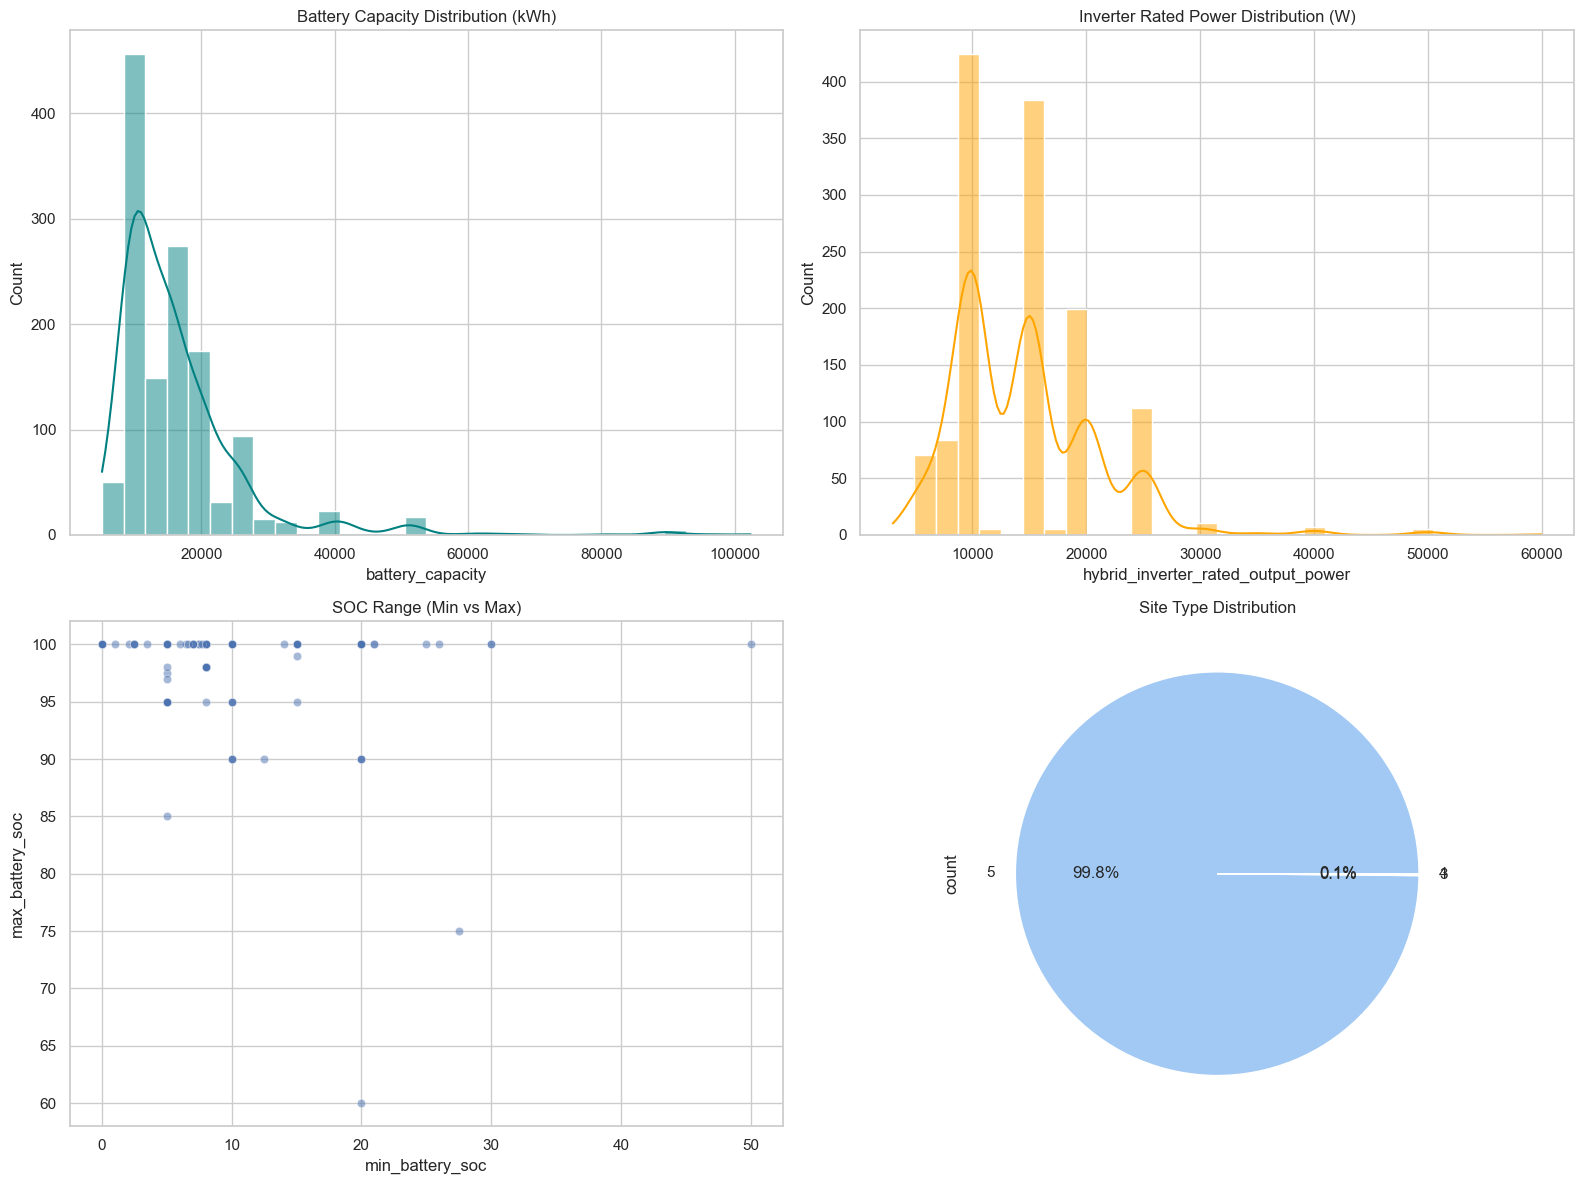

In [10]:
# 深入分析 filtered_station_info.pkl 的数值特征
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from config import Config

station_info = pd.read_pickle(Config.DATA_PATH / "filtered_station_info.pkl")

# 强制转换一些核心指标到数值型
num_cols_to_fix = [
    'battery_capacity', 'battery_max_charge_power', 'battery_max_discharge_power',
    'hybrid_inverter_rated_output_power', 'max_battery_soc', 'min_battery_soc',
    'inverter_pv_capacity'
]

for col in num_cols_to_fix:
    if col in station_info.columns:
        station_info[col] = pd.to_numeric(station_info[col], errors='coerce')

print(f"Total stations: {len(station_info)}")

# 1. 再次检查数值型分布
num_stats = station_info[num_cols_to_fix].describe()
print("\nDescriptive Statistics (Fixed types):")
print(num_stats)

# 2. 分类变量检查
cat_cols = ['site_type', 'connect_type', 'energy_management_mode', 'ai_work_mode']
print("\nCategorical Distributions:")
for col in cat_cols:
    if col in station_info.columns:
        print(f"\n{col} counts:")
        print(station_info[col].value_counts())

# 3. 可视化
plt.figure(figsize=(16, 12))

# 电池容量分布
plt.subplot(2, 2, 1)
sns.histplot(station_info['battery_capacity'].dropna(), bins=30, kde=True, color='teal')
plt.title("Battery Capacity Distribution (kWh)")

# 逆变器额定功率分布
plt.subplot(2, 2, 2)
sns.histplot(station_info['hybrid_inverter_rated_output_power'].dropna(), bins=30, kde=True, color='orange')
plt.title("Inverter Rated Power Distribution (W)")

# SOC 范围
plt.subplot(2, 2, 3)
sns.scatterplot(data=station_info, x='min_battery_soc', y='max_battery_soc', alpha=0.5)
plt.title("SOC Range (Min vs Max)")

# 电站类型分布 (site_type)
plt.subplot(2, 2, 4)
station_info['site_type'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=sns.color_palette('pastel'))
plt.title("Site Type Distribution")

plt.tight_layout()
plt.show()


In [12]:
# 检查是否所有电站都有对应的收益数据记录
import os
import pandas as pd
from config import Config

station_info = pd.read_pickle(Config.DATA_PATH / "filtered_station_info.pkl")
profit_df = pd.read_pickle(Config.DATA_PATH / "profit_metrics_info_df_cleaned.pkl")

# 获取两个表的站点 ID 集合
all_metadata_stations = set(station_info['pvs_site_id'].unique())
stations_with_profit = set(profit_df['pvs_site_id'].unique())

# 计算交集和差集
missing_profit_stations = all_metadata_stations - stations_with_profit
common_stations = all_metadata_stations.intersection(stations_with_profit)

print(f"Station Metadata Total: {len(all_metadata_stations)}")
print(f"Stations with Profit Data: {len(stations_with_profit)}")
print(f"Stations MISSING ALL Profit Data: {len(missing_profit_stations)}")

coverage_rate = len(stations_with_profit) / len(all_metadata_stations)
print(f"Overall Station Coverage Rate: {coverage_rate:.2%}")

# 探究原因：有收益数据和无收益数据的电站在属性上是否有区别？
station_info['has_profit'] = station_info['pvs_site_id'].isin(stations_with_profit)

print("\nComparison by AI Work Mode:")
print(pd.crosstab(station_info['ai_work_mode'], station_info['has_profit'], margins=True))

print("\nComparison by Site Type:")
print(pd.crosstab(station_info['site_type'], station_info['has_profit'], margins=True))

if missing_profit_stations:
    missing_sample = list(missing_profit_stations)[0]
    sample_dir = Config.DATA_PATH / "station_data" / str(missing_sample)
    print(f"\nExample Missing Station {missing_sample} Folder Content:")
    if sample_dir.exists():
        print(os.listdir(sample_dir))
    else:
        print("Folder does not exist in station_data.")


Station Metadata Total: 1315
Stations with Profit Data: 436
Stations MISSING ALL Profit Data: 1002
Overall Station Coverage Rate: 33.16%

Comparison by AI Work Mode:
has_profit    False  True   All
ai_work_mode                   
0                 0     1     1
1               883   266  1149
2               119    46   165
All            1002   313  1315

Comparison by Site Type:
has_profit  False  True   All
site_type                    
3               0     1     1
4               0     1     1
5            1002   311  1313
All          1002   313  1315

Example Missing Station 5543938 Folder Content:
['5543938_2025-04-18_2025-09-27_load_acc.pkl', '5543938_2025-04-18_2025-09-27_pv_acc.pkl', '5543938_point_data.pkl', '5543938_price.pkl']


Analyzing 313 stations found in metadata out of 436 stations in profit table.


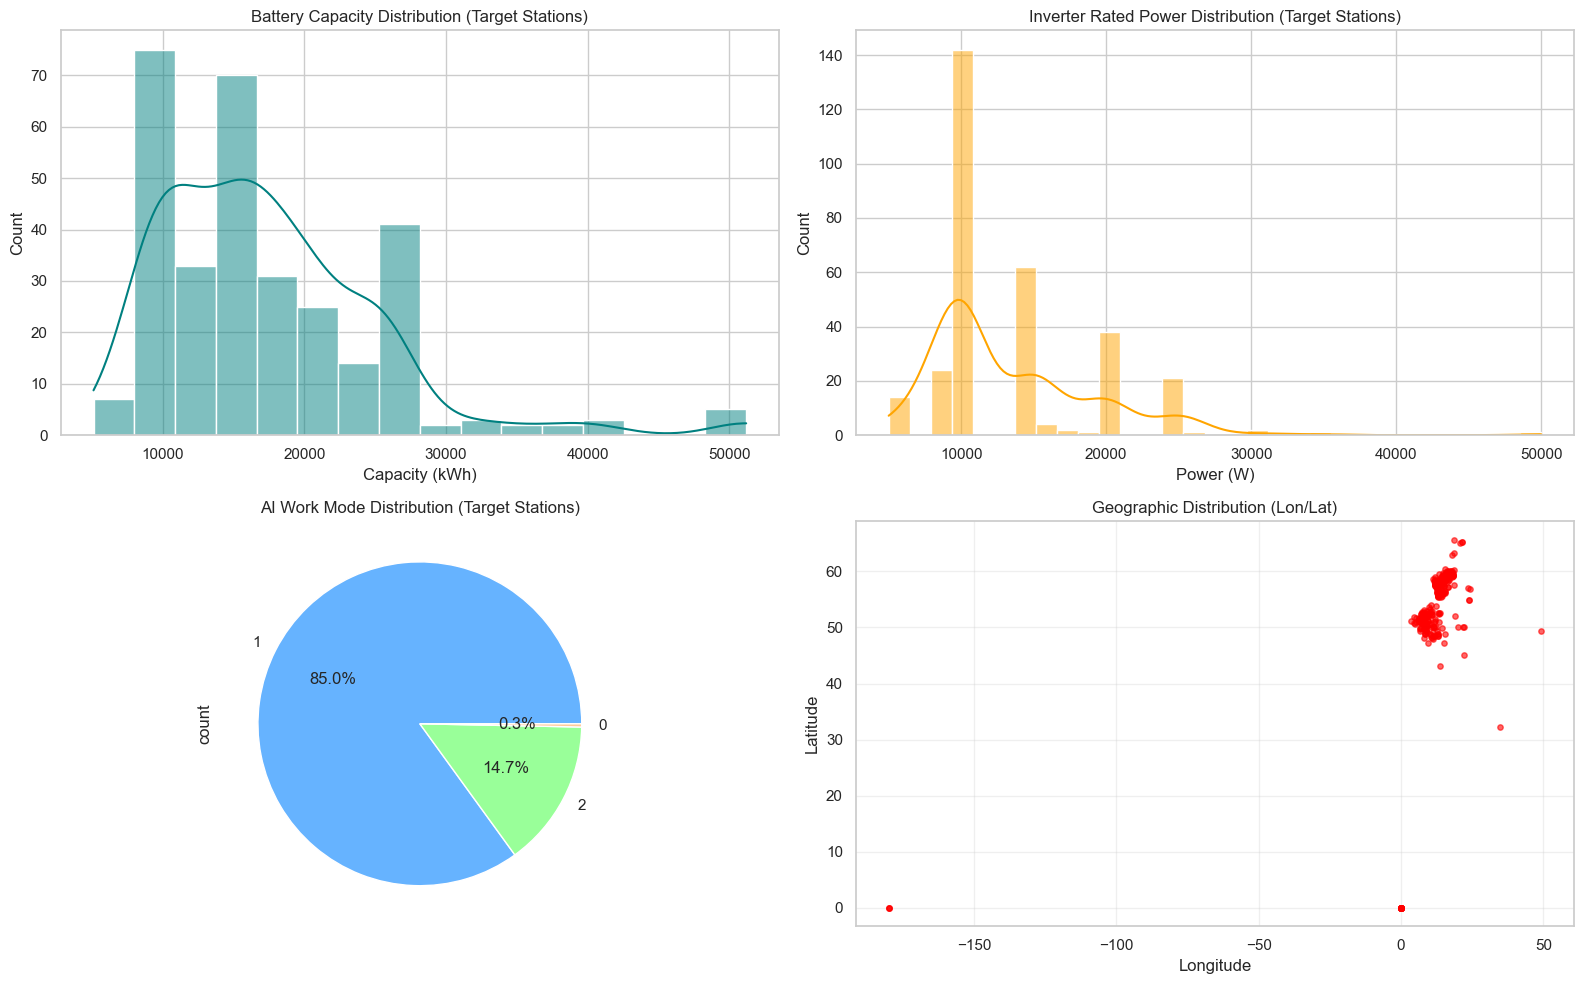


Summary Statistics for Profit-earning Stations:
                                            mean          std     min  \
battery_capacity                    17405.463259  7869.977063  5100.0   
hybrid_inverter_rated_output_power  13405.750799  5799.389239  5000.0   
lon                                    10.272340    19.505657  -180.0   
lat                                    51.317490    14.056021     0.0   

                                             max  
battery_capacity                    51200.000000  
hybrid_inverter_rated_output_power  50000.000000  
lon                                    49.277400  
lat                                    65.636028  

Top 5 Timezone Distribution:
time_zone
GMT+2    194
GMT+1    113
GMT+3      6
Name: count, dtype: int64


In [14]:
# 针对有收益数据的 436 个电站进行画像分析 (规格、位置、AI 模式)

# 1. 获取目标电站列表并过滤元数据
# 注意：profit_df 中的站点 ID 可能是 int 型，需要确保匹配
profit_stations = profit_df['pvs_site_id'].unique()
# 确保 station_info['pvs_site_id'] 也是数值型进行交集匹配
station_info['pvs_site_id'] = pd.to_numeric(station_info['pvs_site_id'], errors='coerce')
target_info = station_info[station_info['pvs_site_id'].isin(profit_stations)].copy()

print(f"Analyzing {len(target_info)} stations found in metadata out of {len(profit_stations)} stations in profit table.")

# 确保数值型
num_cols_to_plot = ['battery_capacity', 'hybrid_inverter_rated_output_power', 'lon', 'lat']
for col in num_cols_to_plot:
    target_info[col] = pd.to_numeric(target_info[col], errors='coerce')

# 2. 规格分布
plt.figure(figsize=(16, 10))

plt.subplot(2, 2, 1)
sns.histplot(target_info['battery_capacity'].dropna(), kde=True, color='teal')
plt.title("Battery Capacity Distribution (Target Stations)")
plt.xlabel("Capacity (kWh)")

plt.subplot(2, 2, 2)
sns.histplot(target_info['hybrid_inverter_rated_output_power'].dropna(), kde=True, color='orange')
plt.title("Inverter Rated Power Distribution (Target Stations)")
plt.xlabel("Power (W)")

# 3. AI 模式分布
plt.subplot(2, 2, 3)
target_info['ai_work_mode'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['#66b3ff','#99ff99','#ffcc99'])
plt.title("AI Work Mode Distribution (Target Stations)")

# 4. 位置分布
plt.subplot(2, 2, 4)
plt.scatter(target_info['lon'], target_info['lat'], alpha=0.6, c='red', s=15)
plt.title("Geographic Distribution (Lon/Lat)")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# 5. 打印具体统计摘要 (更稳健的打印方式)
print("\nSummary Statistics for Profit-earning Stations:")
desc = target_info[num_cols_to_plot].describe().T
available_stats = [stat for stat in ['mean', 'std', 'min', 'max'] if stat in desc.columns]
print(desc[available_stats])

# 6. 检查主要的国家/地区 (时区)
print("\nTop 5 Timezone Distribution:")
print(target_info['time_zone'].value_counts().head(5))


In [27]:
def check_forecast_presence(sid, date_val):
    p = os.path.join(DATA_PATH, "station_data", str(sid), f"{sid}_point_data.pkl")
    if not os.path.exists(p): return "No File"
    
    df = pd.read_pickle(p)
    df['datetime'] = pd.to_datetime(df['datetime'])
    
    # 获取日期部分进行比较
    if hasattr(date_val, 'date'):
        target_date = date_val.date()
    else:
        target_date = date_val
        
    day_data = df[df['datetime'].dt.date == target_date]
    
    if len(day_data) == 0: return "No Day Data"
    
    has_pv_f = day_data['pv_forecast'].notna().any()
    has_load_f = day_data['load_forecast'].notna().any()
    return f"PV_F: {has_pv_f}, Load_F: {has_load_f}, Rows: {len(day_data)}"

# 选样本
sample_ai = profit_df[profit_df['ai_work_mode'] == 1].iloc[0]
sample_non_ai = profit_df[profit_df['ai_work_mode'] == 2].iloc[0]

result_ai = check_forecast_presence(sample_ai['pvs_site_id'], sample_ai['date'])
result_non_ai = check_forecast_presence(sample_non_ai['pvs_site_id'], sample_non_ai['date'])

print(f"Sample AI (SID={sample_ai['pvs_site_id']}, Date={sample_ai['date']}): {result_ai}")
print(f"Sample Non-AI (SID={sample_non_ai['pvs_site_id']}, Date={sample_non_ai['date']}): {result_non_ai}")

Sample AI (SID=5343576, Date=2025-08-31): PV_F: True, Load_F: True, Rows: 288
Sample Non-AI (SID=5041035, Date=2025-07-01): PV_F: True, Load_F: True, Rows: 288


In [28]:
# 检查 point_data 中是否包含多种模式（如 AI 和 Self-mode/Simulink）的时序对比数据
import os
import pandas as pd

def check_for_selfmode_data(sid):
    s_dir = os.path.join(DATA_PATH, "station_data", str(sid))
    point_file = os.path.join(s_dir, f"{sid}_point_data.pkl")
    
    if not os.path.exists(point_file):
        print(f"File not found: {point_file}")
        return
        
    df = pd.read_pickle(point_file)
    print(f"--- Station {sid} Point Data ---")
    print(f"Columns: {df.columns.tolist()}")
    
    # 搜索包含 'sim', 'self', 'base', 'mode' 等关键词的列
    potential_cols = [c for c in df.columns if any(k in c.lower() for k in ['sim', 'self', 'base', 'mode'])]
    print(f"Potential simulation/self-mode columns: {potential_cols}")
    
    # 也检查一下该目录下的其他 pkl 文件，看看有没有专门存放 simulation 结果的文件
    other_files = [f for f in os.listdir(s_dir) if f.endswith('.pkl') and f != f"{sid}_point_data.pkl" and f != f"{sid}_price.pkl"]
    print(f"Other pkl files in directory: {other_files}")
    
    for f in other_files:
        try:
            print(f"\nInspecting {f}:")
            tmp = pd.read_pickle(os.path.join(s_dir, f))
            if isinstance(tmp, pd.DataFrame):
                print(f"  Shape: {tmp.shape}")
                print(f"  Columns: {tmp.columns.tolist()[:10]}")
            else:
                print(f"  Type: {type(tmp)}")
        except:
            print(f"  Could not read {f}")

# 使用之前查到的第一个电站示例
check_for_selfmode_data(s_ids[0])

--- Station 5000617 Point Data ---
Columns: ['datetime', 'load_forecast', 'insert_time_load', 'pv_forecast', 'insert_time_pv', 'pv_power', 'load_power', 'battery_charge_power', 'battery_discharge_power', 'battery_soc', 'available_battery_capacity']
Potential simulation/self-mode columns: []
Other pkl files in directory: ['5000617_2025-04-18_2025-09-27_load_acc.pkl', '5000617_2025-04-18_2025-09-27_pv_acc.pkl']

Inspecting 5000617_2025-04-18_2025-09-27_load_acc.pkl:
  Shape: (114, 7)
  Columns: ['date', 'site_id', 'sample_count', 'load_acc', 'e_rmse_percent', 'max_actual_power', 'max_forecast_power']

Inspecting 5000617_2025-04-18_2025-09-27_pv_acc.pkl:
  Shape: (161, 8)
  Columns: ['date', 'site_id', 'sample_count', 'pv_acc', 'e_rmse_percent', 'max_actual_power', 'max_forecast_power', 'capacity']


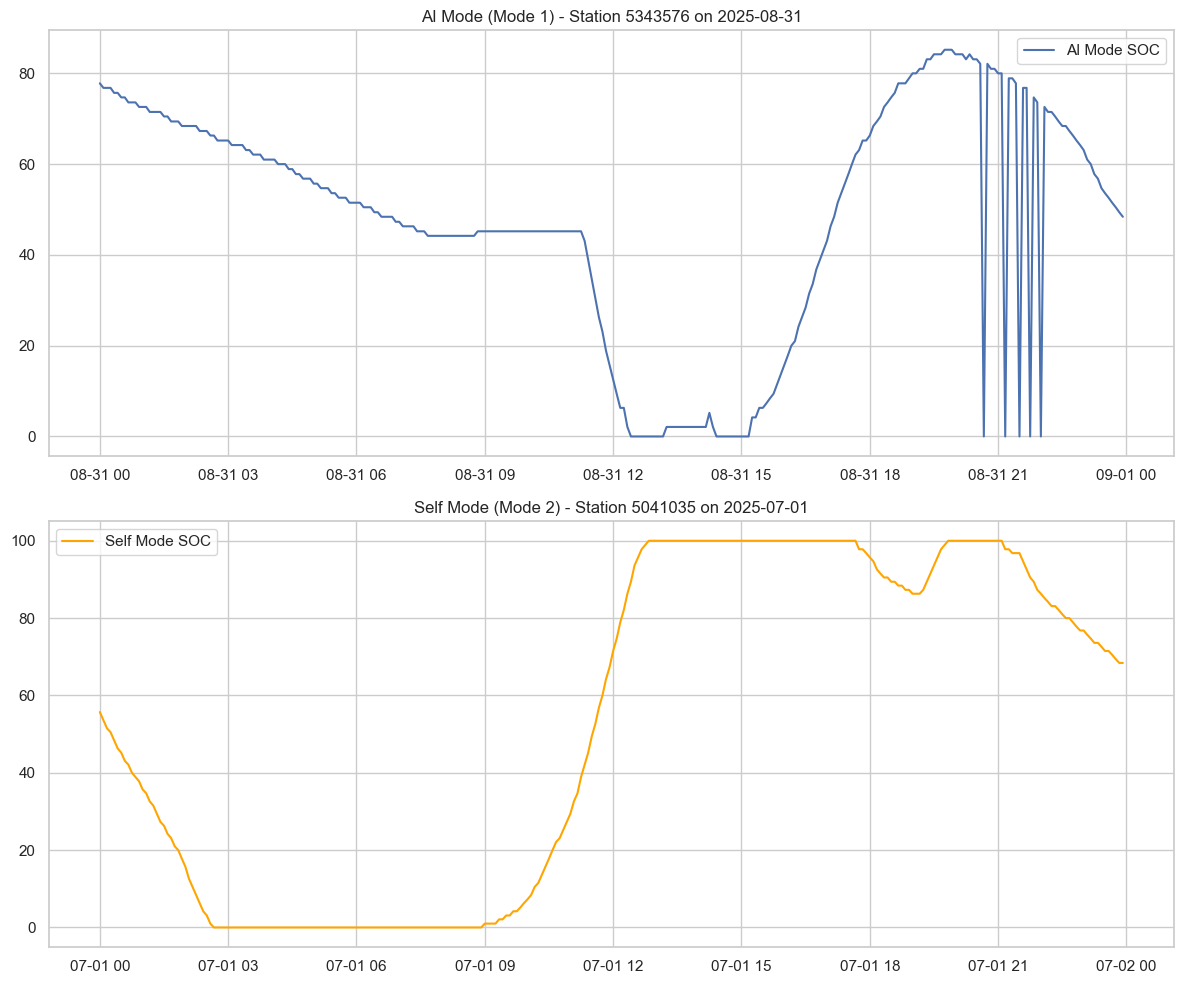


AI Mode Columns: ['datetime', 'load_forecast', 'insert_time_load', 'pv_forecast', 'insert_time_pv', 'pv_power', 'load_power', 'battery_charge_power', 'battery_discharge_power', 'battery_soc', 'available_battery_capacity']
Self Mode Columns: ['datetime', 'load_forecast', 'insert_time_load', 'pv_forecast', 'insert_time_pv', 'pv_power', 'load_power', 'battery_charge_power', 'battery_discharge_power', 'battery_soc', 'available_battery_capacity']


In [29]:
# 对比 AI 模式和 Self-mode 模式下真实的充放电/SOC 表现
# 看看当 ai_work_mode=2 时，数据是否有特定的特征

sample_ai_row = profit_df[profit_df['ai_work_mode'] == 1].iloc[0]
sample_self_row = profit_df[profit_df['ai_work_mode'] == 2].iloc[0]

def get_day_data(sid, date_obj):
    p = os.path.join(DATA_PATH, "station_data", str(sid), f"{sid}_point_data.pkl")
    if not os.path.exists(p): return None
    df = pd.read_pickle(p)
    df['datetime'] = pd.to_datetime(df['datetime'])
    return df[df['datetime'].dt.date == date_obj]

ai_data = get_day_data(sample_ai_row['pvs_site_id'], sample_ai_row['date'])
self_data = get_day_data(sample_self_row['pvs_site_id'], sample_self_row['date'])

import matplotlib.pyplot as plt

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10))

if ai_data is not None:
    ax1.plot(ai_data['datetime'], ai_data['battery_soc'], label='AI Mode SOC')
    ax1.set_title(f"AI Mode (Mode 1) - Station {sample_ai_row['pvs_site_id']} on {sample_ai_row['date']}")
    ax1.legend()

if self_data is not None:
    ax2.plot(self_data['datetime'], self_data['battery_soc'], label='Self Mode SOC', color='orange')
    ax2.set_title(f"Self Mode (Mode 2) - Station {sample_self_row['pvs_site_id']} on {sample_self_row['date']}")
    ax2.legend()

plt.tight_layout()
plt.show()

# 检查是否有 'sim' 前缀的隐藏列再次确认
print("\nAI Mode Columns:", ai_data.columns.tolist() if ai_data is not None else "N/A")
print("Self Mode Columns:", self_data.columns.tolist() if self_data is not None else "N/A")

In [30]:
# 扩大搜索范围，看看是否有电站包含 "simulink" 或 "baseline" 相关的时序文件
import os

all_st_dirs = [d for d in os.listdir(STATION_DATA_PATH) if os.path.isdir(os.path.join(STATION_DATA_PATH, d))]
found_special_files = []

print(f"Scanning {len(all_st_dirs)} station directories for simulation-related files...")

for sid in all_st_dirs[:500]: # 扫描前 500 个
    s_path = os.path.join(STATION_DATA_PATH, sid)
    files = os.listdir(s_path)
    # 查找包含 'sim', 'base', 'self', 'compare' 关键词的文件
    specials = [f for f in files if any(k in f.lower() for k in ['sim', 'base', 'self', 'compare'])]
    if specials:
        found_special_files.append((sid, specials))

if found_special_files:
    print(f"Found {len(found_special_files)} stations with potentially special files.")
    for sid, files in found_special_files[:10]:
        print(f"Station {sid}: {files}")
else:
    print("No special simulation-related files found in the sampled stations.")

# 检查一下 profit_df 里的列，看看是否有提示对比数据存储位置的字段
print("\nProfit Table Columns again to be sure:")
print(profit_df.columns.tolist())

Scanning 1314 station directories for simulation-related files...
No special simulation-related files found in the sampled stations.

Profit Table Columns again to be sure:
['pvs_site_id', 'date', 'ai_work_mode', 'purchased_price_exist', 'feed_in_price_exist', 'history_data_exist', 'pv_day_energy', 'load_day_energy', 'battery_charge_day_energy_ai_mode', 'battery_discharge_day_energy_ai_mode', 'feed_grid_day_energy_ai_mode', 'fetch_grid_day_energy_ai_mode', 'feed_grid_day_incomes_ai_mode', 'fetch_grid_day_fees_ai_mode', 'station_day_cost_ai_mode', 'station_day_profit_ai_mode', 'battery_charge_day_energy_simulink_mode', 'battery_discharge_day_energy_simulink_mode', 'feed_grid_day_energy_simulink_mode', 'fetch_grid_day_energy_simulink_mode', 'feed_grid_day_incomes_simulink_mode', 'fetch_grid_day_fees_simulink_mode', 'station_day_cost_simulink_mode', 'station_day_profit_simulink_mode', 'cost_down_rate_percent', 'profit_increase_rate_percent', 'insert_time']


In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import random
import os
from pathlib import Path

# 确保 STATION_DATA_PATH 已定义，如果没有则使用默认路径
if 'STATION_DATA_PATH' not in locals():
    # 尝试从 Config 获取，或者回退到默认
    try:
        from config import Config
        station_path = Config.STATION_PATH
    except:
        station_path = Path("../Interpretability_action_dataset/station_data")
else:
    station_path = STATION_DATA_PATH

def plot_random_station_day(base_path):
    # 获取所有站点目录
    station_dirs = [d for d in base_path.iterdir() if d.is_dir()]
    if not station_dirs:
        print(f"No station directories found in {base_path}")
        return
        
    # 随机选择一个站点
    random_station_dir = random.choice(station_dirs)
    # 获取该站点的所有 .pkl 文件（通常每天一个文件）
    day_files = list(random_station_dir.glob("*.pkl"))
    
    if not day_files:
        print(f"No .pkl files found in {random_station_dir}")
        return
        
    # 随机选择一个日期文件
    random_day_file = random.choice(day_files)
    print(f"Station ID: {random_station_dir.name}")
    print(f"Selected Day File: {random_day_file.name}")
    print(f"Loading from: {random_day_file}")
    
    # 读取数据
    df = pd.read_pickle(random_day_file)
    
    # 预处理：转换时间列并排序
    if 'datetime' in df.columns:
        df['datetime'] = pd.to_datetime(df['datetime'])
        df = df.sort_values('datetime')
    
    # 定义需要绘制的列
    cols_to_plot = [
        'pv_power', 'load_power', 'battery_soc', 
        'battery_charge_power', 'battery_discharge_power'
    ]
    # 只绘制数据框中存在的列
    available_cols = [col for col in cols_to_plot if col in df.columns]
    
    if not available_cols:
        print("No plottable columns found in the data.")
        print("Available columns are:", df.columns.tolist())
        return
        
    # 绘图
    fig, axes = plt.subplots(len(available_cols), 1, figsize=(15, 3 * len(available_cols)), sharex=True)
    if len(available_cols) == 1:
        axes = [axes]
        
    for ax, col in zip(axes, available_cols):
        # 如果有 datetime 列则作为 x 轴，否则用 index
        x_data = df['datetime'] if 'datetime' in df.columns else df.index
        ax.plot(x_data, df[col], label=col, color='tab:blue' if 'soc' not in col else 'tab:orange')
        ax.set_ylabel(col)
        ax.legend(loc='upper right')
        ax.grid(True, linestyle='--', alpha=0.7)
    
    plt.xlabel("Time")
    plt.suptitle(f"Power & SOC Curves - Station {random_station_dir.name} ({random_day_file.name})", fontsize=16)
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

# 执行绘图
plot_random_station_day(station_path)


Station ID: 5801633
Selected Day File: 5801633_2025-04-18_2025-09-27_pv_acc.pkl
Loading from: E:\Interpretability_action_dataset\station_data\5801633\5801633_2025-04-18_2025-09-27_pv_acc.pkl
No plottable columns found in the data.
Available columns are: ['date', 'site_id', 'sample_count', 'pv_acc', 'e_rmse_percent', 'max_actual_power', 'max_forecast_power', 'capacity']
